# Practical 6: Interacting with Web APIs

In this practical, we will explore how to interact with web APIs using Python. We'll focus on freely accessible APIs that don't require API keys. We'll perform various experiments including:

1. Making basic requests to public APIs
2. Parsing JSON responses
3. Working with query parameters
4. Handling pagination
5. Data visualization of API data

Let's get started!

## 1. Import Required Libraries

We'll need several libraries for working with APIs:

In [35]:
# Import necessary libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import JSON, display
import numpy as np  # For data manipulation

## 2. Basic API Request - JSONPlaceholder API

Let's start with a simple API request to JSONPlaceholder, a free fake API for testing and prototyping.

In [36]:
# Make a GET request to JSONPlaceholder API
response = requests.get('https://jsonplaceholder.typicode.com/posts')

# Check if the request was successful
if response.status_code == 200:
    # Display the first 5 posts
    posts = response.json()
    print(f"Total posts: {len(posts)}")
    print("\nFirst 5 posts:")
    for post in posts[:5]:
        print(f"Post ID: {post['id']}, Title: {post['title']}")
else:
    print(f"Error: {response.status_code}")

Total posts: 100

First 5 posts:
Post ID: 1, Title: sunt aut facere repellat provident occaecati excepturi optio reprehenderit
Post ID: 2, Title: qui est esse
Post ID: 3, Title: ea molestias quasi exercitationem repellat qui ipsa sit aut
Post ID: 4, Title: eum et est occaecati
Post ID: 5, Title: nesciunt quas odio


## 3. Converting API Response to DataFrame

Let's convert the JSON response to a pandas DataFrame for easier analysis.

In [37]:
# Convert the response to a DataFrame
posts_df = pd.DataFrame(posts)

# Display the first few rows
posts_df.head()

,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...
3,1,4,eum et est occaecati,ullam et saepe reiciendis voluptatem adipisci\...
4,1,5,nesciunt quas odio,repudiandae veniam quaerat sunt sed\nalias aut...


## 4. Working with Query Parameters

APIs often allow filtering or customizing results using query parameters.

In [38]:
# Make a request with query parameters to filter posts by user
params = {'userId': 1}
response = requests.get('https://jsonplaceholder.typicode.com/posts', params=params)

# Convert to DataFrame and display
user_posts_df = pd.DataFrame(response.json())
print(f"Number of posts by user 1: {len(user_posts_df)}")
user_posts_df.head()

Number of posts by user 1: 10


,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...
3,1,4,eum et est occaecati,ullam et saepe reiciendis voluptatem adipisci\...
4,1,5,nesciunt quas odio,repudiandae veniam quaerat sunt sed\nalias aut...


## 5. Exploring Different HTTP Methods

Let's try different HTTP methods like POST, PUT, and DELETE with JSONPlaceholder API.

In [39]:
# Creating a new post with POST request
new_post = {
    'title': 'Data Analysis with Python',
    'body': 'Learning how to interact with APIs using Python is essential for data analysis.',
    'userId': 1
}

post_response = requests.post('https://jsonplaceholder.typicode.com/posts', json=new_post)

if post_response.status_code == 201:  # 201 means Created
    created_post = post_response.json()
    print("New post created successfully!")
    print(f"ID: {created_post['id']}")
    print(f"Title: {created_post['title']}")
    print(f"Body: {created_post['body']}")
    print(f"User ID: {created_post['userId']}")
else:
    print(f"Error: {post_response.status_code}")

New post created successfully!
ID: 101
Title: Data Analysis with Python
Body: Learning how to interact with APIs using Python is essential for data analysis.
User ID: 1


In [40]:
# Updating an existing post with PUT request
updated_post = {
    'id': 1,
    'title': 'Updated Title',
    'body': 'This post has been updated using a PUT request.',
    'userId': 1
}

put_response = requests.put('https://jsonplaceholder.typicode.com/posts/1', json=updated_post)

if put_response.status_code == 200:  # 200 means OK
    updated = put_response.json()
    print("Post updated successfully!")
    print(f"ID: {updated['id']}")
    print(f"New Title: {updated['title']}")
    print(f"New Body: {updated['body']}")
else:
    print(f"Error: {put_response.status_code}")

Post updated successfully!
ID: 1
New Title: Updated Title
New Body: This post has been updated using a PUT request.


In [41]:
# Deleting a post with DELETE request
delete_response = requests.delete('https://jsonplaceholder.typicode.com/posts/1')

if delete_response.status_code == 200:
    print("Post deleted successfully!")
else:
    print(f"Error: {delete_response.status_code}")

Post deleted successfully!


## 6. Working with COVID-19 Data API

Let's use a public API to get COVID-19 data and analyze trends.

In [42]:
# Function to get COVID-19 data for a country
def get_covid_data(country='all'):
    if country.lower() == 'all':
        url = 'https://disease.sh/v3/covid-19/all'
    else:
        url = f'https://disease.sh/v3/covid-19/countries/{country}'
        
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [43]:
# Get global COVID-19 data
global_data = get_covid_data()

if global_data:
    print("Global COVID-19 Statistics:")
    print(f"Total Cases: {global_data['cases']:,}")
    print(f"Total Deaths: {global_data['deaths']:,}")
    print(f"Total Recovered: {global_data['recovered']:,}")
    print(f"Active Cases: {global_data['active']:,}")
    print(f"Critical Cases: {global_data['critical']:,}")
    print(f"Tests: {global_data['tests']:,}")
    print(f"Population: {global_data['population']:,}")
    print(f"Affected Countries: {global_data['affectedCountries']:,}")

Global COVID-19 Statistics:
Total Cases: 704,753,890
Total Deaths: 7,010,681
Total Recovered: 675,619,811
Active Cases: 22,123,398
Critical Cases: 34,794
Tests: 7,026,505,313
Population: 7,944,935,131
Affected Countries: 231


In [44]:
# Get COVID-19 data for multiple countries
countries = ['USA', 'India', 'Brazil', 'UK', 'France']
covid_country_data = []

for country in countries:
    data = get_covid_data(country)
    if data and isinstance(data, dict):
        covid_country_data.append({
            'country': data.get('country', country),
            'cases': data.get('cases', 0),
            'deaths': data.get('deaths', 0),
            'recovered': data.get('recovered', 0),
            'active': data.get('active', 0),
            'tests': data.get('tests', 0),
            'population': data.get('population', 0)
        })
    time.sleep(0.5)  # To avoid hitting rate limits

# Convert to DataFrame
covid_df = pd.DataFrame(covid_country_data)
covid_df

,country,cases,deaths,recovered,active,tests,population
0,USA,111820082,1219487,109814428,786167,1186851502,334805269
1,India,45035393,533570,0,44501823,935879495,1406631776
2,Brazil,38743918,711380,36249161,1783377,63776166,215353593
3,UK,24910387,232112,24678275,0,522526476,68497907
4,France,40138560,167642,39970918,0,271490188,65584518


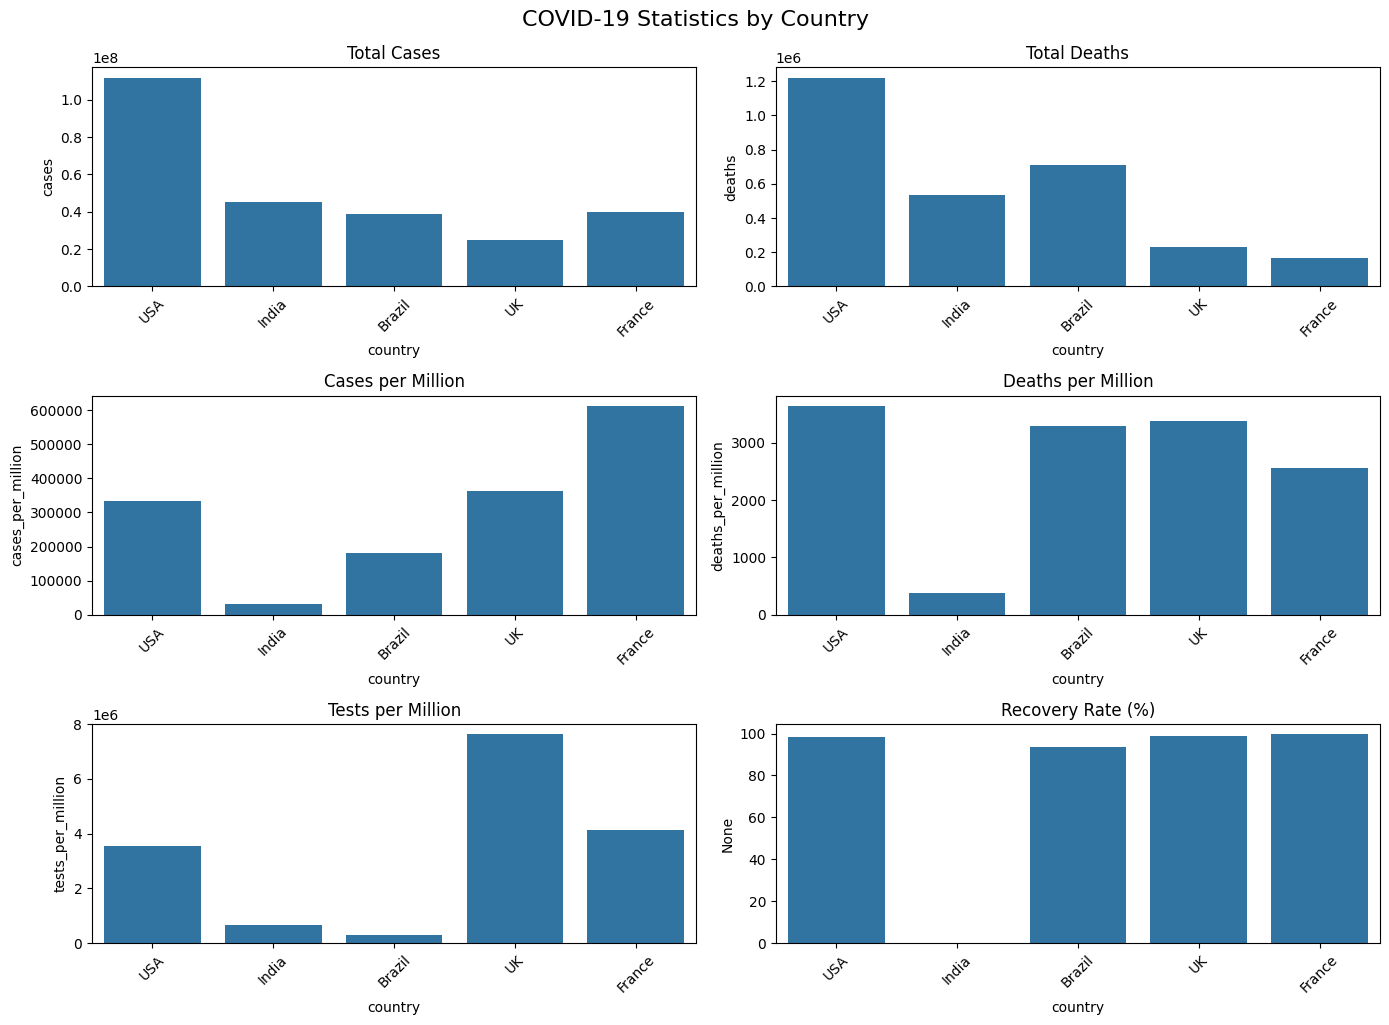

In [45]:
# Calculate per capita metrics for better comparison
covid_df['cases_per_million'] = (covid_df['cases'] / covid_df['population']) * 1000000
covid_df['deaths_per_million'] = (covid_df['deaths'] / covid_df['population']) * 1000000
covid_df['tests_per_million'] = (covid_df['tests'] / covid_df['population']) * 1000000

# Visualize COVID-19 cases by country
plt.figure(figsize=(14, 10))

# Create subplots for different metrics
plt.subplot(3, 2, 1)
sns.barplot(x='country', y='cases', data=covid_df)
plt.title('Total Cases')
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)
sns.barplot(x='country', y='deaths', data=covid_df)
plt.title('Total Deaths')
plt.xticks(rotation=45)

plt.subplot(3, 2, 3)
sns.barplot(x='country', y='cases_per_million', data=covid_df)
plt.title('Cases per Million')
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)
sns.barplot(x='country', y='deaths_per_million', data=covid_df)
plt.title('Deaths per Million')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.barplot(x='country', y='tests_per_million', data=covid_df)
plt.title('Tests per Million')
plt.xticks(rotation=45)

plt.subplot(3, 2, 6)
recovery_rate = (covid_df['recovered'] / covid_df['cases']) * 100
sns.barplot(x=covid_df['country'], y=recovery_rate)
plt.title('Recovery Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('COVID-19 Statistics by Country', fontsize=16, y=1.02)
plt.show()

## 7. Using GitHub API to Get Repository Information

Let's interact with the GitHub API to get information about repositories. The GitHub API allows a certain number of requests without authentication.

In [46]:
# Function to get GitHub repository information
def get_github_repo_info(repo):
    url = f'https://api.github.com/repos/{repo}'
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}, {response.text}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [47]:
# Get information about popular data science repositories
repos = ['pandas-dev/pandas', 'numpy/numpy', 'matplotlib/matplotlib', 'scikit-learn/scikit-learn']
repo_data = []

for repo in repos:
    data = get_github_repo_info(repo)
    if data:
        repo_info = {
            'name': data['name'],
            'stars': data['stargazers_count'],
            'forks': data['forks_count'],
            'open_issues': data['open_issues_count'],
            'language': data['language'],
            'created_at': data['created_at'],
            'updated_at': data['updated_at']
        }
        repo_data.append(repo_info)
    time.sleep(1)  # To avoid hitting GitHub's rate limits

# Convert to DataFrame
repo_df = pd.DataFrame(repo_data)

# Convert date strings to datetime objects
repo_df['created_at'] = pd.to_datetime(repo_df['created_at'])
repo_df['updated_at'] = pd.to_datetime(repo_df['updated_at'])

repo_df

,name,stars,forks,open_issues,language,created_at,updated_at
0,pandas,45167,18438,3709,Python,2010-08-24 01:37:33+00:00,2025-04-18 03:53:59+00:00
1,numpy,29319,10715,2279,Python,2010-09-13 23:02:39+00:00,2025-04-18 04:04:25+00:00
2,matplotlib,21067,7834,1657,Python,2011-02-19 03:17:12+00:00,2025-04-18 03:20:52+00:00
3,scikit-learn,61773,25765,2161,Python,2010-08-17 09:43:38+00:00,2025-04-18 03:52:00+00:00


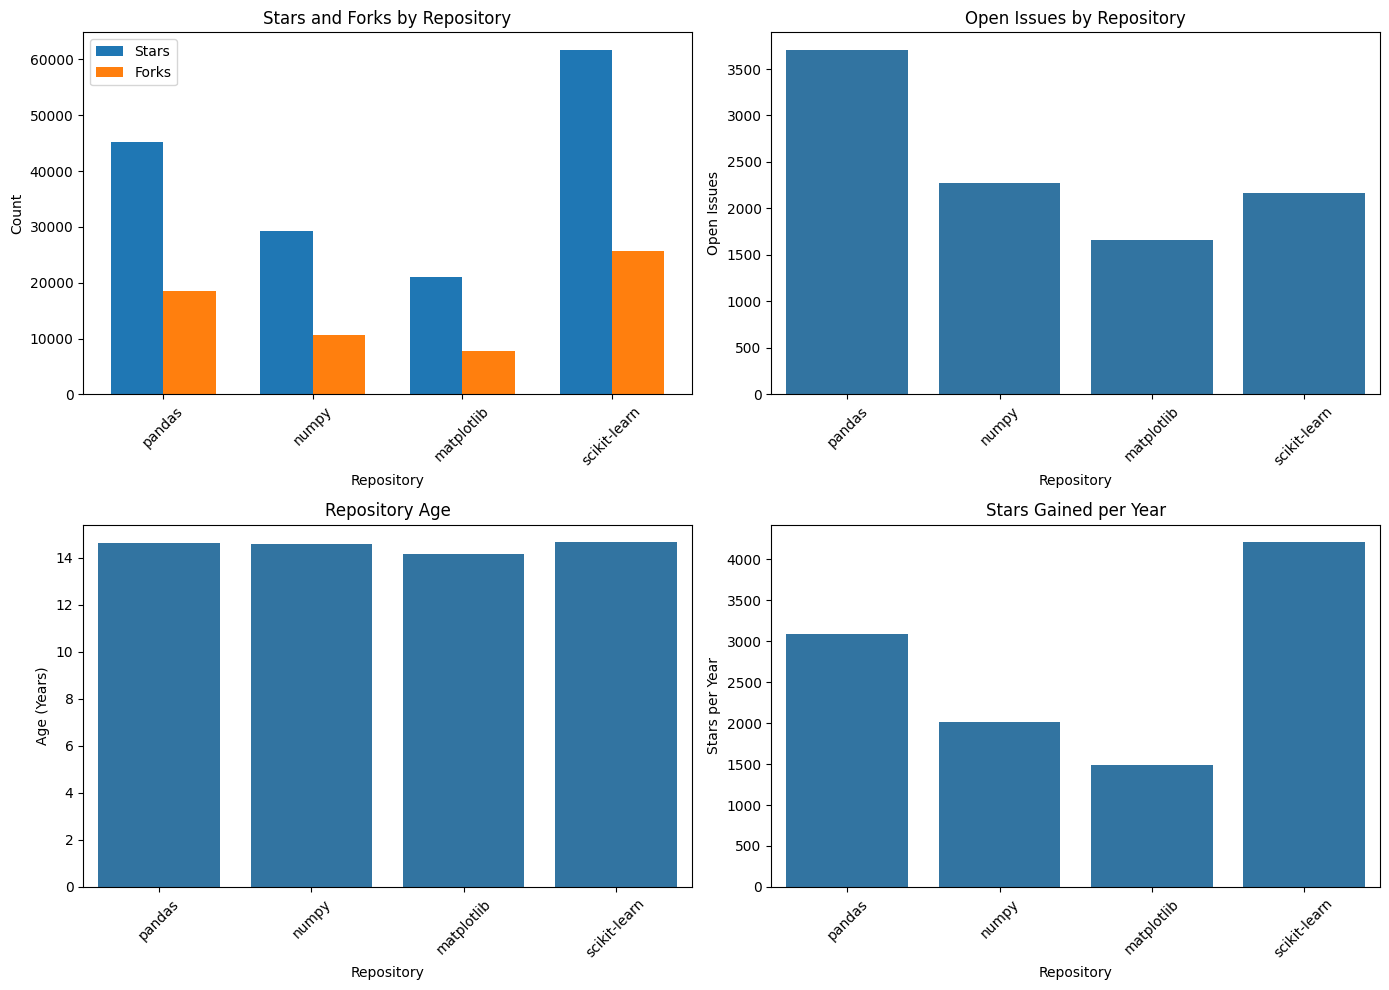

In [48]:
# Visualize the GitHub repository data
plt.figure(figsize=(14, 10))

# Plot stars and forks
plt.subplot(2, 2, 1)
x = range(len(repo_df))
width = 0.35

plt.bar(x, repo_df['stars'], width, label='Stars')
plt.bar([i + width for i in x], repo_df['forks'], width, label='Forks')

plt.xlabel('Repository')
plt.ylabel('Count')
plt.title('Stars and Forks by Repository')
plt.xticks([i + width/2 for i in x], repo_df['name'], rotation=45)
plt.legend()

# Plot open issues
plt.subplot(2, 2, 2)
sns.barplot(x='name', y='open_issues', data=repo_df)
plt.xlabel('Repository')
plt.ylabel('Open Issues')
plt.title('Open Issues by Repository')
plt.xticks(rotation=45)

# Plot repository age in years - FIX: Make both timestamps timezone-naive
plt.subplot(2, 2, 3)
now = pd.Timestamp.now().tz_localize(None)  # Make timezone-naive
# Ensure created_at is also timezone-naive
repo_df['created_at_naive'] = repo_df['created_at'].dt.tz_localize(None)
repo_df['age_years'] = (now - repo_df['created_at_naive']).dt.days / 365.25
sns.barplot(x='name', y='age_years', data=repo_df)
plt.xlabel('Repository')
plt.ylabel('Age (Years)')
plt.title('Repository Age')
plt.xticks(rotation=45)

# Plot Stars per Year of existence
plt.subplot(2, 2, 4)
repo_df['stars_per_year'] = repo_df['stars'] / repo_df['age_years']
sns.barplot(x='name', y='stars_per_year', data=repo_df)
plt.xlabel('Repository')
plt.ylabel('Stars per Year')
plt.title('Stars Gained per Year')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 8. Working with REST Countries API

Let's get and analyze data about countries using the REST Countries API.

In [49]:
# Function to get information about a country
def get_country_info(country_name=None):
    if country_name:
        url = f'https://restcountries.com/v3.1/name/{country_name}'
    else:
        url = 'https://restcountries.com/v3.1/all'
        
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}, {response.text}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [50]:
# Get information about specific countries
country_names = ['India', 'United States', 'Japan', 'Germany', 'Brazil', 'Australia', 'South Africa', 'Canada', 'Mexico', 'Russia']
country_data = []

for country_name in country_names:
    data = get_country_info(country_name)
    if data and isinstance(data, list) and len(data) > 0:
        country = data[0]
        currencies = list(country.get('currencies', {}).keys())
        currency_name = currencies[0] if currencies else 'Unknown'
        
        country_info = {
            'name': country['name']['common'],
            'capital': country.get('capital', ['Unknown'])[0] if country.get('capital') else 'Unknown',
            'population': country.get('population', 0),
            'area': country.get('area', 0),
            'region': country.get('region', 'Unknown'),
            'subregion': country.get('subregion', 'Unknown'),
            'currency': currency_name,
            'languages': len(country.get('languages', {})),
            'flag': country.get('flag', ''),
            'independent': country.get('independent', False)
        }
        country_data.append(country_info)
    time.sleep(0.5)  # To avoid hitting rate limits

# Convert to DataFrame
country_df = pd.DataFrame(country_data)
country_df

,name,capital,population,area,region,subregion,currency,languages,flag,independent
0,India,New Delhi,1380004385,3287590.0,Asia,Southern Asia,INR,3,🇮🇳,True
1,United States Minor Outlying Islands,Washington DC,300,34.2,Americas,North America,USD,1,🇺🇲,False
2,Japan,Tokyo,125836021,377930.0,Asia,Eastern Asia,JPY,1,🇯🇵,True
3,Germany,Berlin,83240525,357114.0,Europe,Western Europe,EUR,1,🇩🇪,True
4,Brazil,Brasília,212559409,8515767.0,Americas,South America,BRL,1,🇧🇷,True
5,Australia,Canberra,25687041,7692024.0,Oceania,Australia and New Zealand,AUD,1,🇦🇺,True
6,South Africa,Pretoria,59308690,1221037.0,Africa,Southern Africa,ZAR,11,🇿🇦,True
7,Canada,Ottawa,38005238,9984670.0,Americas,North America,CAD,2,🇨🇦,True
8,Mexico,Mexico City,128932753,1964375.0,Americas,North America,MXN,1,🇲🇽,True
9,Russia,Moscow,144104080,17098242.0,Europe,Eastern Europe,RUB,1,🇷🇺,True


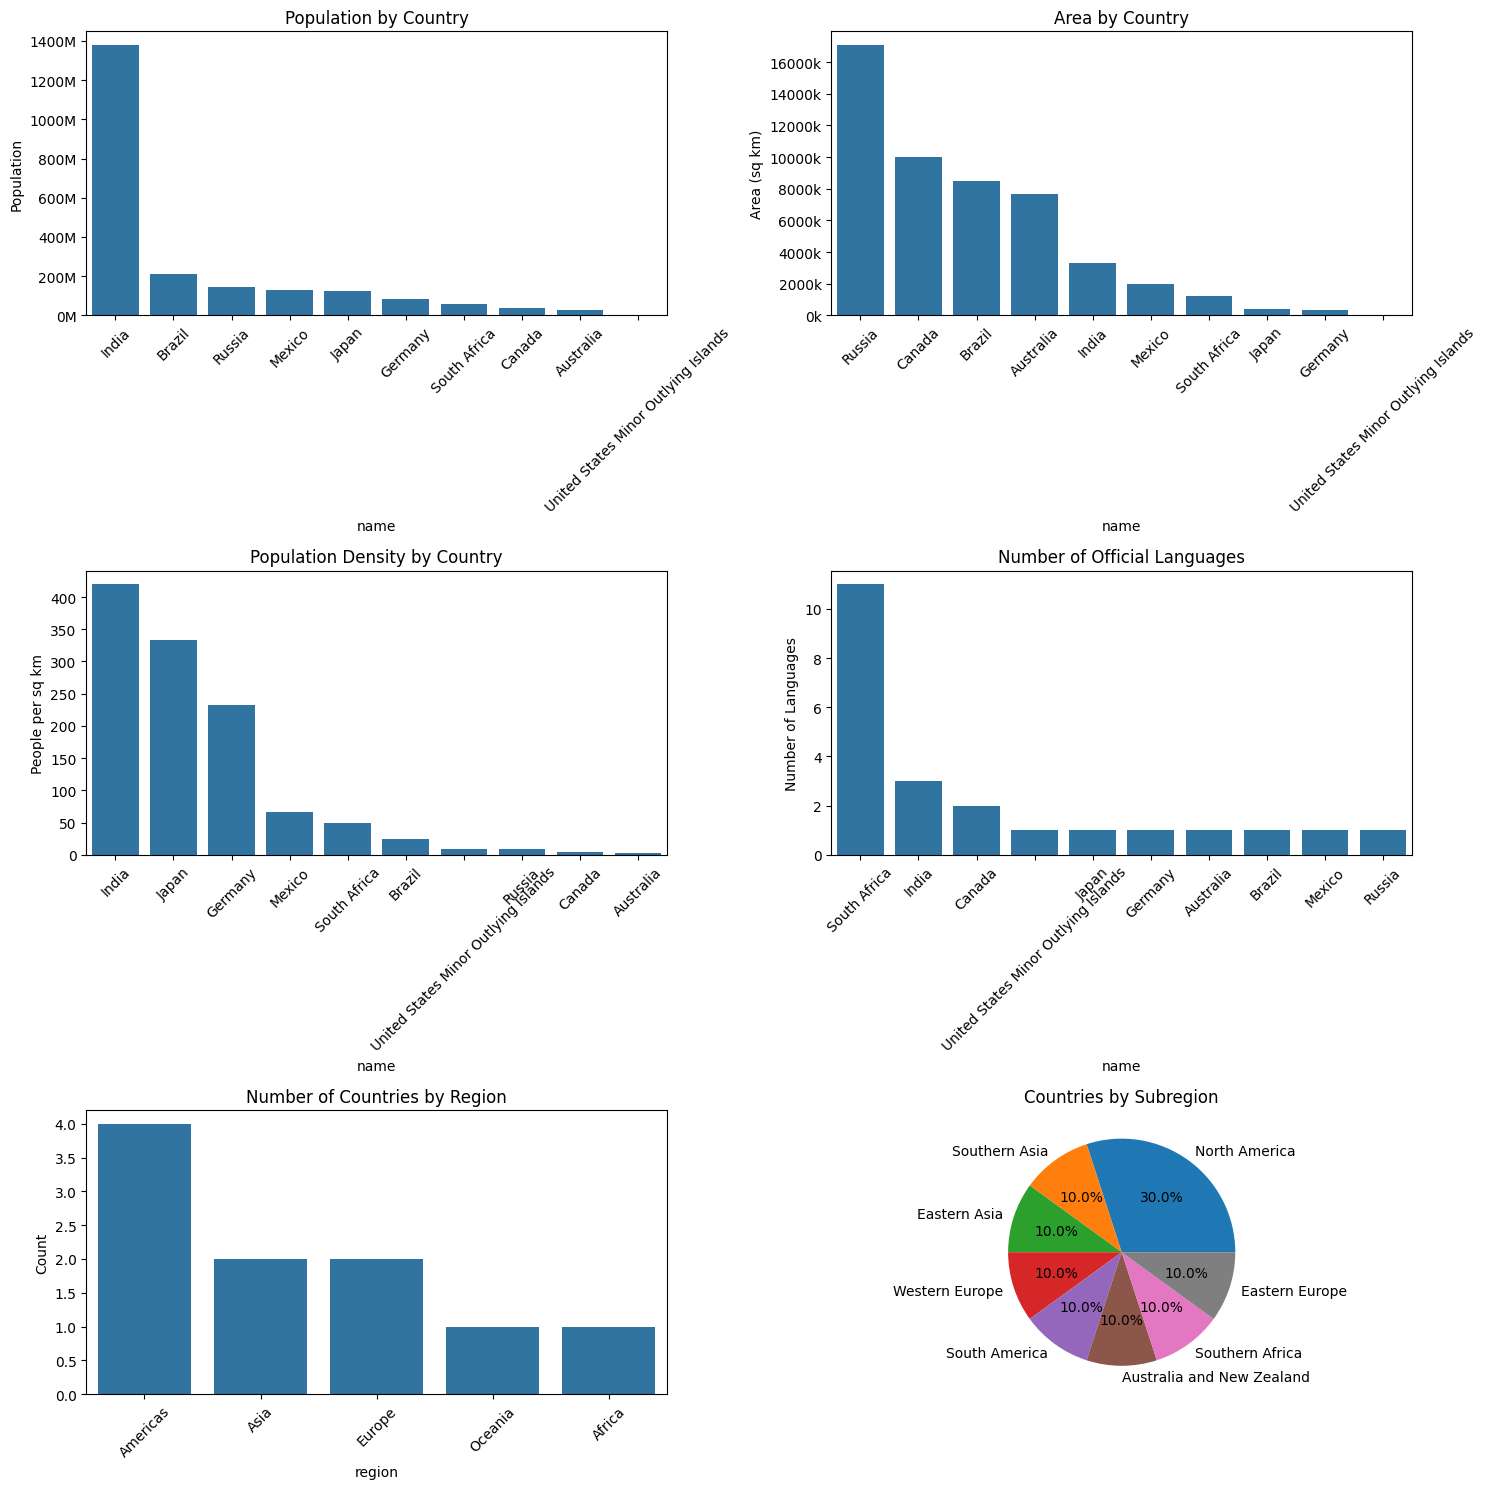

In [51]:
# Create visualization of country data
plt.figure(figsize=(15, 15))

# Population (in millions)
plt.subplot(3, 2, 1)
population_sorted = country_df.sort_values('population', ascending=False)
sns.barplot(x='name', y='population', data=population_sorted)
plt.title('Population by Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
# Format y-axis to show in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000000)}M"))

# Area (in thousands of sq km)
plt.subplot(3, 2, 2)
area_sorted = country_df.sort_values('area', ascending=False)
sns.barplot(x='name', y='area', data=area_sorted)
plt.title('Area by Country')
plt.ylabel('Area (sq km)')
plt.xticks(rotation=45)
# Format y-axis to show in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k"))

# Population Density (people per sq km)
plt.subplot(3, 2, 3)
country_df['density'] = country_df['population'] / country_df['area']
density_sorted = country_df.sort_values('density', ascending=False)
sns.barplot(x='name', y='density', data=density_sorted)
plt.title('Population Density by Country')
plt.ylabel('People per sq km')
plt.xticks(rotation=45)

# Number of languages
plt.subplot(3, 2, 4)
lang_sorted = country_df.sort_values('languages', ascending=False)
sns.barplot(x='name', y='languages', data=lang_sorted)
plt.title('Number of Official Languages')
plt.ylabel('Number of Languages')
plt.xticks(rotation=45)

# Countries by region
plt.subplot(3, 2, 5)
region_counts = country_df['region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Countries by Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Pie chart of countries by subregion
plt.subplot(3, 2, 6)
subregion_counts = country_df['subregion'].value_counts()
plt.pie(subregion_counts.values, labels=subregion_counts.index, autopct='%1.1f%%')
plt.title('Countries by Subregion')

plt.tight_layout()
plt.show()

## 9. Working with Public Jokes API

Let's interact with a public jokes API to get random jokes.

In [52]:
# Function to get jokes from different categories
def get_joke(category=None):
    if category:
        url = f'https://official-joke-api.appspot.com/jokes/{category}/random'
    else:
        url = 'https://official-joke-api.appspot.com/random_joke'
        
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [53]:
# Get a random joke
random_joke = get_joke()
if random_joke:
    print("Random Joke:")
    print(f"Type: {random_joke['type']}")
    print(f"Setup: {random_joke['setup']}")
    print(f"Punchline: {random_joke['punchline']}")

Random Joke:
Type: general
Setup: What do you call a pig with three eyes?
Punchline: Piiig


In [54]:
# Get programming jokes
programming_jokes = requests.get('https://official-joke-api.appspot.com/jokes/programming/ten').json()

# Display programming jokes
for i, joke in enumerate(programming_jokes, 1):
    print(f"Joke #{i}")
    print(f"Setup: {joke['setup']}")
    print(f"Punchline: {joke['punchline']}")
    print("-" * 40)

Joke #1
Setup: Why do programmers always get Christmas and Halloween mixed up?
Punchline: Because DEC 25 = OCT 31
----------------------------------------
Joke #2
Setup: What is the most used language in programming?
Punchline: Profanity.
----------------------------------------
Joke #3
Setup: Why did the programmer always mix up Halloween and Christmas?
Punchline: Because Oct 31 equals Dec 25.
----------------------------------------
Joke #4
Setup: A user interface is like a joke.
Punchline: If you have to explain it then it is not that good.
----------------------------------------
Joke #5
Setup: Why don't programmers like nature?
Punchline: There's too many bugs.
----------------------------------------
Joke #6
Setup: Where do programmers like to hangout?
Punchline: The Foo Bar.
----------------------------------------
Joke #7
Setup: What's the best thing about a Boolean?
Punchline: Even if you're wrong, you're only off by a bit.
----------------------------------------
Joke #8
Setu

In [55]:
# Collect jokes from different categories
joke_categories = ['general', 'programming']
all_jokes = []

for category in joke_categories:
    url = f'https://official-joke-api.appspot.com/jokes/{category}/ten'
    response = requests.get(url)
    if response.status_code == 200:
        jokes = response.json()
        for joke in jokes:
            joke['category'] = category
            all_jokes.append(joke)

# Convert to DataFrame
jokes_df = pd.DataFrame(all_jokes)
jokes_df.head()

,type,setup,punchline,id,category
0,general,What are the strongest days of the week?,Saturday and Sunday...the rest are weekdays.,154,general
1,general,What kind of tree fits in your hand?,A palm tree!,257,general
2,general,What did one plate say to the other plate?,Dinner is on me!,161,general
3,general,What do you call a fly without wings?,A walk.,206,general
4,general,What type of music do balloons hate?,Pop music!,261,general


Number of jokes by category:
category
general        10
programming    10
Name: count, dtype: int64


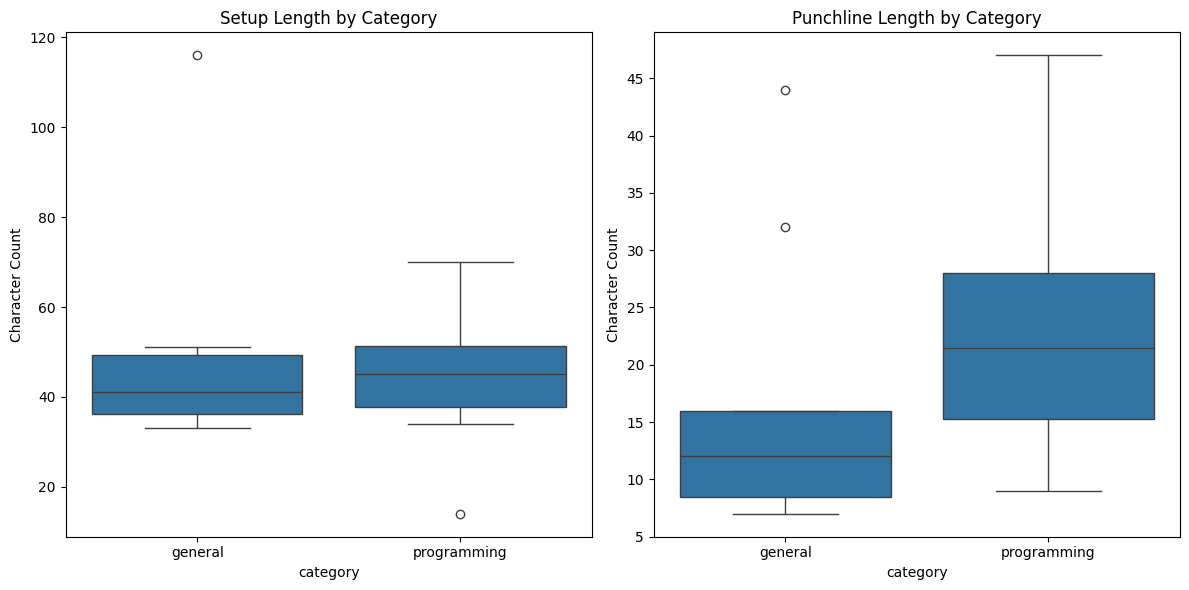

In [56]:
# Analyze joke data
# Count jokes by type
print("Number of jokes by category:")
print(jokes_df['category'].value_counts())

# Analyze joke length
jokes_df['setup_length'] = jokes_df['setup'].apply(len)
jokes_df['punchline_length'] = jokes_df['punchline'].apply(len)
jokes_df['total_length'] = jokes_df['setup_length'] + jokes_df['punchline_length']

# Visualize joke lengths by category
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='category', y='setup_length', data=jokes_df)
plt.title('Setup Length by Category')
plt.ylabel('Character Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='category', y='punchline_length', data=jokes_df)
plt.title('Punchline Length by Category')
plt.ylabel('Character Count')

plt.tight_layout()
plt.show()

## 10. Public Dog Breeds API

Let's interact with the Dog API to get images and information about dog breeds.

In [57]:
# Function to get random dog image
def get_random_dog_image(breed=None):
    if breed:
        url = f'https://dog.ceo/api/breed/{breed}/images/random'
    else:
        url = 'https://dog.ceo/api/breeds/image/random'
        
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [58]:
# Get a random dog image
random_dog = get_random_dog_image()
if random_dog and random_dog['status'] == 'success':
    image_url = random_dog['message']
    print(f"Random dog image URL: {image_url}")
    
    # Display the image
    from IPython.display import Image, display
    display(Image(url=image_url, width=400))

Random dog image URL: https://images.dog.ceo/breeds/poodle-miniature/n02113712_3138.jpg


In [59]:
# Get list of all dog breeds
all_breeds_response = requests.get('https://dog.ceo/api/breeds/list/all')
if all_breeds_response.status_code == 200:
    all_breeds_data = all_breeds_response.json()
    if all_breeds_data['status'] == 'success':
        breeds_dict = all_breeds_data['message']
        
        # Create DataFrame with breeds
        breeds_data = []
        for main_breed, sub_breeds in breeds_dict.items():
            if sub_breeds:  # If there are sub-breeds
                for sub_breed in sub_breeds:
                    breeds_data.append({
                        'main_breed': main_breed,
                        'sub_breed': sub_breed,
                        'full_name': f"{sub_breed} {main_breed}"
                    })
            else:  # If there are no sub-breeds
                breeds_data.append({
                    'main_breed': main_breed,
                    'sub_breed': '',
                    'full_name': main_breed
                })
                
        breeds_df = pd.DataFrame(breeds_data)
        print(f"Total number of breeds and sub-breeds: {len(breeds_df)}")
        print(f"Number of main breeds: {len(breeds_dict)}")
        
        # Display first few breeds
        breeds_df.head(10)

Total number of breeds and sub-breeds: 162
Number of main breeds: 107


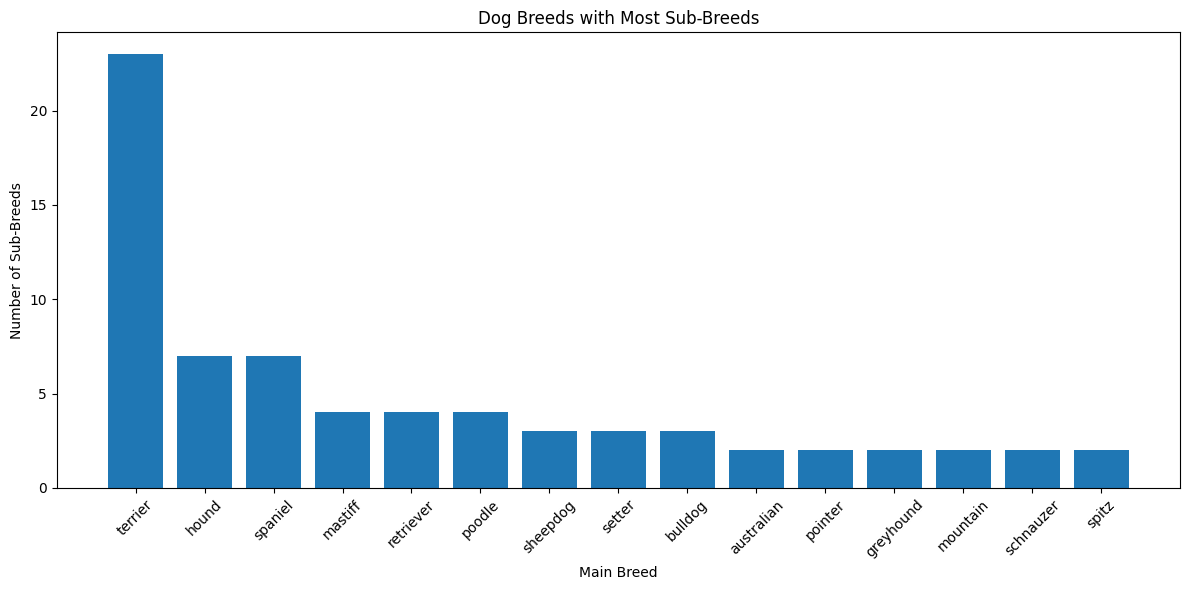


Random terrier image:



Random hound image:



Random spaniel image:



Random mastiff image:



Random retriever image:


In [60]:
# Analyze breed data

# Find breeds with most sub-breeds
sub_breed_counts = breeds_df['main_breed'].value_counts()
top_breeds_with_sub = sub_breed_counts[sub_breed_counts > 1]

plt.figure(figsize=(12, 6))
plt.bar(top_breeds_with_sub.index, top_breeds_with_sub.values)
plt.title('Dog Breeds with Most Sub-Breeds')
plt.xlabel('Main Breed')
plt.ylabel('Number of Sub-Breeds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display example images for top 5 breeds with most sub-breeds
top_5_breeds = top_breeds_with_sub.index[:5]
for breed in top_5_breeds:
    dog_image = get_random_dog_image(breed)
    if dog_image and dog_image['status'] == 'success':
        print(f"\nRandom {breed} image:")
        display(Image(url=dog_image['message'], width=300))
    time.sleep(0.5)  # To avoid hitting rate limits

## 11. Handling API Rate Limits and Errors

Let's implement a function that handles rate limits and errors when making API requests.

In [61]:
# Function to make API requests with retry logic
def make_api_request(url, max_retries=3, retry_delay=2):
    retries = 0
    while retries < max_retries:
        try:
            response = requests.get(url)
            
            # Check if we hit a rate limit
            if response.status_code == 429:
                retry_after = int(response.headers.get('Retry-After', retry_delay))
                print(f"Rate limit hit. Waiting for {retry_after} seconds...")
                time.sleep(retry_after)
                retries += 1
                continue
                
            # If we got a successful response, return it
            if response.status_code == 200:
                return response.json()
                
            # Handle other errors
            else:
                print(f"Error: {response.status_code}, {response.text}")
                return None
                
        except Exception as e:
            print(f"An error occurred: {e}")
            retries += 1
            if retries < max_retries:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print("Max retries reached.")
                return None
                
    return None

In [62]:
# Test our function with a real API endpoint
data = make_api_request('https://jsonplaceholder.typicode.com/users')

if data:
    print(f"Successfully retrieved data for {len(data)} users")
    # Display the first user's information
    first_user = data[0]
    print(f"\nUser: {first_user['name']}")
    print(f"Email: {first_user['email']}")
    print(f"Company: {first_user['company']['name']}")

Successfully retrieved data for 10 users

User: Leanne Graham
Email: Sincere@april.biz
Company: Romaguera-Crona


## 12. Summary and Conclusion

In this practical, we've learned several key aspects of working with Web APIs that don't require API keys:

1. Making HTTP requests (GET, POST, PUT, DELETE) to retrieve and manipulate data from APIs
2. Parsing JSON responses and converting them to pandas DataFrames
3. Working with query parameters to filter API results
4. Handling rate limits and errors using retry logic
5. Visualizing data retrieved from various public APIs

We used several free public APIs including:
- JSONPlaceholder API for basic CRUD operations
- COVID-19 API for global pandemic statistics
- GitHub API for repository information
- REST Countries API for country data
- Jokes API for humor datasets
- Dog API for breeds and images

These skills are essential for data scientists and analysts who need to interact with external data sources through APIs without requiring authentication or API keys.